In [457]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

# Имитация случайного события

In [493]:
def rand_event(p: float, count: int = 1e6):
    x = np.random.uniform(size=int(count))
    res = []
    for x_i in x:
        res.append(int(x_i <= p))
    
    pl = len(res)
    plt.axhline(y= p)
    plt.axhline(y= 1 - p)
    plt.hist(res, bins=2, color="red", edgecolor="black", alpha=0.7, rwidth=0.85, range=[0, 1], weights=[1/count]*pl)
    plt.xticks([0.2, 0.8], ['True', 'False'], fontsize=14)
    #return res


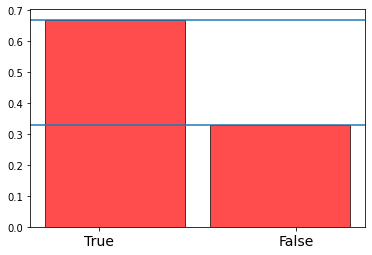

In [494]:
rand_event(0.33)

# Имитация сложного события

In [559]:
def complex_rand_event(p_a: float, p_b: float, count = 1e6):
    
    count = int(count)
    x1 = np.random.uniform(size=count)
    x2 = np.random.uniform(size=count)

    p_ab = []  # AB AB̅ ĀB ĀB̅

    ab_dict = {'AB': 0, 'AB!': 0, 'A!B': 0, 'A!B!': 0}
    
    for i in range(0, count):
        if x1[i] < p_a:
            if x2[i] < p_b:
                p_ab.append(0)
                ab_dict['AB'] += 1
            else:
                p_ab.append(1)
                ab_dict['AB!'] += 1
        else:
            if x2[i] < p_b:
                p_ab.append(2)
                ab_dict['A!B'] += 1
            else:
                p_ab.append(3)
                ab_dict['A!B!'] += 1   
    print(ab_dict)
    p_l = len(p_ab)
    
    #plt.bar(*zip(*ab_dict.items()), color="red", edgecolor="black")
    plt.axhline(y= p_a)
    plt.axhline(y= p_b)
    plt.hist(p_ab, bins=[0, 1, 2, 3, 4], color="red", edgecolor="black", alpha=0.7, rwidth=0.85, weights=[1/p_l] * p_l)
    plt.xticks([0.5, 1.5, 2.5, 3.5], ['AB', 'AB̅', 'ĀB', 'ĀB̅'], fontsize=14)

In [564]:
def complex_rand_event2(p_a: float, p_b: float, count = 1e6):
    
    count = int(count)
    x1 = np.random.uniform(size=count)
    x2 = np.random.uniform(size=count)

    ab_dict = {'AB': 0, 'AB!': 0, 'A!B': 0, 'A!B!': 0}
    
    for i in range(0, count):
        ab_dict['AB'] += int(x1[i] <= p_a and x2[i] <= p_b)
        ab_dict['AB!'] += int(x1[i] <= p_a and x2[i] > p_b)
        ab_dict['A!B'] += int(x1[i] > p_a and x2[i] <= p_b)
        ab_dict['A!B!'] += int(x1[i] > p_a and x2[i] > p_b)

    print(ab_dict)
    plt.bar(*zip(*ab_dict.items()), color="red", edgecolor="black")

{'AB': 3, 'AB!': 2, 'A!B': 1, 'A!B!': 4}
None


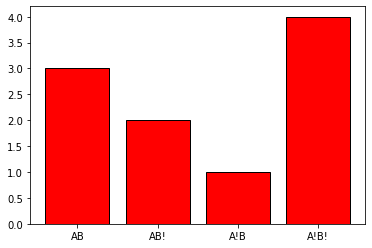

In [565]:
print(complex_rand_event2(0.5, 0.34, 10))

# Имитация сложного события, состоящего из зависимых событий.

In [545]:
def compl_dep_events2(p_a: float, p_b_a: float, count = 1e6):

    count = int(count)
    x1 = np.random.uniform(size=count)
    x2 = np.random.uniform(size=count)

    p_b_na = 1 - p_b_a  # P(B|!A)

    res = []
    ab_dict = {'AB': 0, 'AB!': 0, 'A!B': 0, 'A!B!': 0}
    """
    for i in range(0, count):
        if x1[i] <= p_a:
            if x2[i] <= p_b_a:
                res.append(0)
                ab_dict['AB'] += 1
            else:
                res.append(2)
                ab_dict['A!B'] += 1
        else:
            if x2[i] <= p_b_na:
                res.append(1)
                ab_dict['AB!'] += 1
            else:
                res.append(3)
                ab_dict['A!B!'] += 1
    """
    for i in range(0, count):
        ab_dict['AB'] += int(x1[i] <= p_a and x2[i] <= p_b_a)
        ab_dict['AB!'] += int(x1[i] <= p_a and x2[i] > p_b_a)
        ab_dict['A!B'] += int(x1[i] > p_a and x2[i] <= p_b_na)
        ab_dict['A!B!'] += int(x1[i] > p_a and x2[i] > p_b_na)
       
    print(ab_dict)
    p_l = len(res)
    plt.bar(*zip(*ab_dict.items()), color="red", edgecolor="black")
   # plt.hist(res, bins=[0, 1, 2, 3, 4], color="red", edgecolor="black", alpha=0.7, rwidth=0.85, weights=[1/p_l] * p_l)
   # plt.xticks([0.5, 1.5, 2.5, 3.5], ['AB', 'AB̅', 'ĀB', 'ĀB̅'], fontsize=14)
   


{'AB': 2, 'AB!': 4, 'A!B': 3, 'A!B!': 1}


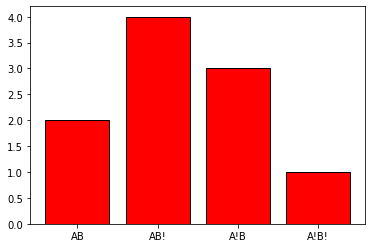

In [550]:
compl_dep_events2(0.45, 0.13, 10)

In [112]:
def compl_dep_events(p_a: float, p_b_a: float):
    x1 = random.random()
    x2 = random.random()
    """
    p_na = 1 - p_a  # P(Ā)
    p_b_na = 1 - p_b_a   # P(B|Ā)

    p_a_with_b = p_b_a * p_a  # P(A^B) = P(A) + P(B) - P(A*B)     P(A|B) = P(A^B) / P(B)


    p_nb = 1 - p_b

    p_ab = p_a * p_b   # P(A*B)


    p_a_b = p_a_with_b / p_b    # P(A|B)

    p_a_nb = 1 - p_a_b          # P(A| NOT B)

    """

    p_b_na = p_not(p_b_a)
    p_na = p_not(p_a)

    p_b = p_b_a * p_a + p_b_na * p_na    # P(B) = P(B|A) * P(A) + P(B|Ā) * P(Ā)

    p_nb_a = a_b(p_not(p_b), p_a)
    p_nb_na = a_b(p_not(p_b), p_na)

    p_a_b = a_b(p_a, p_b)

    p_ab = p_a * p_b_a
    p_anb = p_a * p_not(p_b)
    p_nab = p_not(p_a) * p_b_na
    p_nanb = p_not(p_a) * p_not(p_b)

    #  Ā
    #  B̅

    print('P(AB) = ', p_ab)
    print('P(AB̅) = ', p_anb)
    print('P(ĀB) = ', p_nab)
    print('P(ĀB̅) = ', p_nanb)


    p_1 = (x1 <= p_a, x2 <= p_b_a)   # AB
    p_2 = (x1 > p_a, x2 <= p_b_na)  # A NOT B
    p_3 = (x1 <= p_a, x2 > p_b_a)    # NOT A B
    p_4 = (x1 > p_a, x2 > p_b_na)   # NOT A NOT B

    print('p 1 = ', p_1)
    print('p 2 = ', p_2)
    print('p 3 = ', p_3)
    print('p 4 = ', p_4)



def p_not(p: float):                            # P(NOT A)
    return 1 - p

def a_with_b(p_a: float, p_b: float):           # P(A^B)
    return p_a + p_b - (p_a * p_b)

def a_b(p_a: float, p_b: float):                # P(A|B)
    p_a_with_b = a_with_b(p_a, p_b)
    return p_a_with_b / p_b

compl_dep_events(0.45, 0.13)


P(AB) =  0.24165000000000003
P(AB̅) =  0.20834999999999998
P(ĀB) =  0.29535000000000006
P(ĀB̅) =  0.25465
p 1 =  (False, False)
p 2 =  (True, True)
p 3 =  (False, True)
p 4 =  (True, False)


# Имитация событий, составляющих полную группу

In [566]:
def full_group_event(p: [float] = [0.1, 0.35, 0.3, 0.2, 0.05], count = 1e6):
    count = int(count)
    x = np.around(np.random.uniform(size=count), 6)

    tmp = [p[0]]
    for i in range(1, len(p)):
        tmp.append(np.around(tmp[i - 1] + p[i], 6))
        print(tmp[i] , ' ', p[i])
    tmp = [0] + tmp
    print(tmp)

    res = []
    for i in range(0, count):
        for k in range(1, len(tmp)):
           # print(i, ' ', j)
            if x[i] < tmp[k] and x[i] >= tmp[k - 1]:
                #print(tmp[k - 1], ' <= ', x[i], ' < ', tmp[k])
                res.append(k - 1)
                break

   # print(res)
    l = dict(Counter(res))
    print(l)

    p_l = len(res)
    plt.bar(*zip(*l.items()), color="red", edgecolor="black")
   # plt.hist(res, bins=[0, 1, 2, 3, 4, 5], color="red", edgecolor="black", alpha=0.7, rwidth=0.85, weights=[1/p_l] * p_l)
   # plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], tmp[1:], fontsize=14)

#full_group_event(count=10)     

0.45   0.35
0.75   0.3
0.95   0.2
1.0   0.05
[0, 0.1, 0.45, 0.75, 0.95, 1.0]
{1: 350325, 3: 200243, 2: 300238, 4: 49482, 0: 99712}


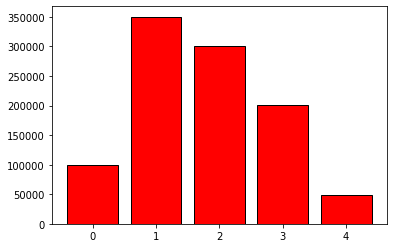

In [567]:
full_group_event()